In [3]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr



In [123]:
data = pd.read_csv("data_processed.csv", encoding='cp1252', encoding_errors="ignore")

## locate non numeric values
data['isnumeric'] = pd.to_numeric(data['A5'],errors='coerce').notna()

## get the index of non numeric values
false_indices = data[data['isnumeric'] == False].index

## drop the column with invalid age values
data.drop(index=false_indices, inplace=True)

#The "None" values in this column were counting as nulls, so I had to switch them to strings
data['A4'] = data[['A4']].fillna('None')



A4    0
dtype: int64


,Unnamed: 0,..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F24,F25,F26,F27,F28,F29,F30,F31,F32,isnumeric
0,598,5/29/2020 8:11,Philippines,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,2,5,4,5,4,1,5,1,1,True
1,230,5/23/2020 1:54,USA (or Other American),US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,4,2,5,4,2,4,1,4,True
2,232,5/23/2020 2:01,USA (or Other American),US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,4,1,5,3,2,5,2,4,True
3,308,5/25/2020 1:34,Philippines,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,2,3,4,5,5,2,5,1,2,True
4,231,5/23/2020 2:00,Mixed American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,4,4,3,4,4,1,5,5,5,True


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


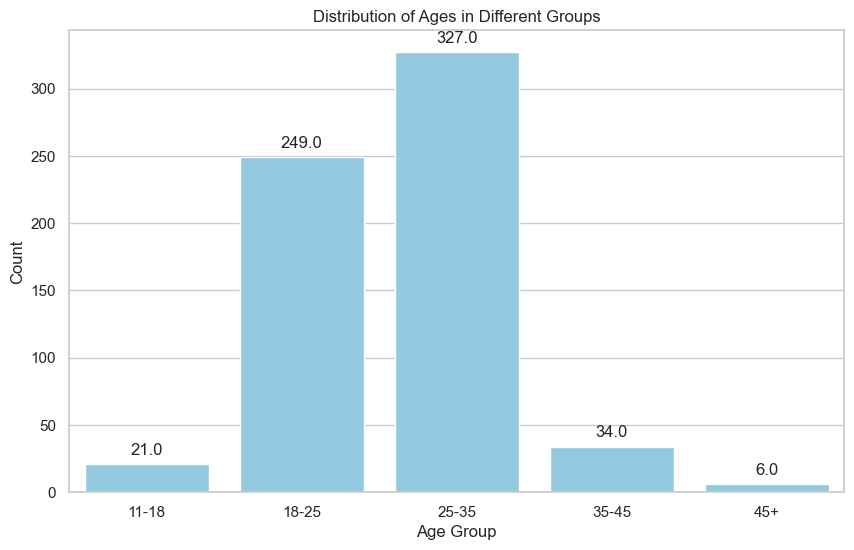

In [165]:
# Convert 'A5' to numeric
data['A5'] = pd.to_numeric(data['A5'], errors='coerce')

# Define bins(ranges of ages) [11-18, 18-25, 25-35, 35-45, 45-55,] and labels
bins = [11, 18, 25, 35, 45, 55]
labels = ['11-18', '18-25', '25-35', '35-45', '45-55']

# Create age categories
data['AgeGroup'] = pd.cut(data['A5'], bins=bins, labels=labels, right=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=data['AgeGroup'].value_counts().index, y=data['AgeGroup'].value_counts().values, color='skyblue')

# Add count annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Ages in Different Groups')

plt.show()

c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

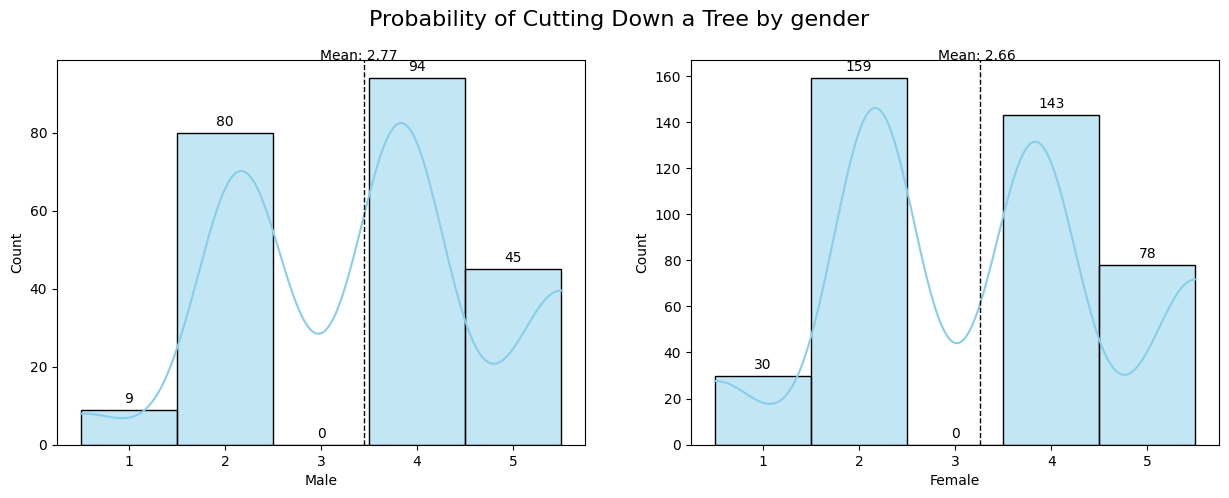

In [156]:

#assigning the cutting down tree column
column = 'E17'

#Split the dataframe into two different dataframes, male and female
male_data_frame = data[data['A2'] == 'Male']
female_data_frame = data[data['A2'] == 'Female']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot histogram for male_data_frame
sns.histplot(male_data_frame[column], bins=5, kde=True, ax=ax1, color='skyblue', edgecolor='black')

# Add mean line for male_data_frame
mean_value_male = male_data_frame[column].mean()
ax1.axvline(mean_value_male, color='k', linestyle='dashed', linewidth=1)

# Add mean text annotation for male_data_frame
min_ylim1, max_ylim1 = ax1.get_ylim()
ax1.text(mean_value_male * 0.9, max_ylim1 * 1, f'Mean: {mean_value_male:.2f}')

# Add tally of votes to each bar for male_data_frame
for rect in ax1.patches:
    height = rect.get_height()
    ax1.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Set title and label for male histogram
ax1.set_xlabel('Male')
ax1.set_xticks([1.3, 1.9, 2.5, 3.1,3.7])  # Set x-ticks in the center of each bar
ax1.set_xticklabels([1, 2, 3, 4, 5])  # Set x-tick labels

# Plot histogram for female_data_frame
sns.histplot(female_data_frame[column], bins=5, kde=True, ax=ax2, color='skyblue', edgecolor='black')

# Add mean line for female_data_frame
mean_value_female = female_data_frame[column].mean()
ax2.axvline(mean_value_female, color='k', linestyle='dashed', linewidth=1)

# Add mean text annotation for female_data_frame
min_ylim2, max_ylim2 = ax2.get_ylim()
ax2.text(mean_value_female * 0.9, max_ylim2 * 1, f'Mean: {mean_value_female:.2f}')

# Add tally of votes to each bar for female_data_frame
for rect in ax2.patches:
    height = rect.get_height()
    ax2.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Set title and label for female histogram
ax2.set_xlabel('Female')
ax2.set_xticks([1.3, 1.9, 2.5, 3.1,3.7])  # Set x-ticks in the center of each bar
ax2.set_xticklabels([1, 2, 3, 4, 5])  # Set x-tick labels

# Set the overall title
fig.suptitle('Probability of Cutting Down a Tree by gender', fontsize=16)

plt.show()


In [166]:
# Columns to iterate over
columns_to_iterate = [f'C{i}' for i in range(1, 16, 1)]
biggest_difference = []

# Iterate over columns and print means for male and female dataframes
for column in columns_to_iterate:
    print(f"Column: {column}")
    print(f"Male Mean: {male_data_frame[column].mean()}")
    print(f"Female Mean: {female_data_frame[column].mean()}")
    difference = abs(male_data_frame[column].mean() - female_data_frame[column].mean())
    print("Difference: ", difference)
    print()
    
    



Column: C1
Male Mean: 3.776315789473684
Female Mean: 3.7878048780487803
Difference:  0.011489088575096229

Column: C2
Male Mean: 2.56140350877193
Female Mean: 3.2195121951219514
Difference:  0.6581086863500216

Column: C3
Male Mean: 3.9517543859649122
Female Mean: 4.185365853658537
Difference:  0.2336114676936245

Column: C4
Male Mean: 2.4078947368421053
Female Mean: 2.8585365853658535
Difference:  0.4506418485237482

Column: C5
Male Mean: 4.12280701754386
Female Mean: 4.458536585365854
Difference:  0.3357295678219945

Column: C6
Male Mean: 2.1052631578947367
Female Mean: 2.178048780487805
Difference:  0.07278562259306831

Column: C7
Male Mean: 4.030701754385965
Female Mean: 4.46829268292683
Difference:  0.4375909285408648

Column: C8
Male Mean: 2.6535087719298245
Female Mean: 3.5829268292682928
Difference:  0.9294180573384683

Column: C9
Male Mean: 4.0701754385964914
Female Mean: 4.404878048780488
Difference:  0.3347026101839967

Column: C10
Male Mean: 3.017543859649123
Female Mean: 4

In [12]:
data['A2'] = data['A2'].replace({'Male':1, 'Female':0})
for column in data.columns[14:29]:
    corr_coefficient, p_value = pointbiserialr(data['A2'], data[column])
    print(f"Point-biserial correlation for {column}: {corr_coefficient:.4f}, p-value: {p_value:.4f}")

Point-biserial correlation for C1: -0.0058, p-value: 0.8829
Point-biserial correlation for C2: -0.2933, p-value: 0.0000
Point-biserial correlation for C3: -0.1288, p-value: 0.0011
Point-biserial correlation for C4: -0.2064, p-value: 0.0000
Point-biserial correlation for C5: -0.1885, p-value: 0.0000
Point-biserial correlation for C6: -0.0330, p-value: 0.4058
Point-biserial correlation for C7: -0.2391, p-value: 0.0000
Point-biserial correlation for C8: -0.3420, p-value: 0.0000
Point-biserial correlation for C9: -0.1914, p-value: 0.0000
Point-biserial correlation for C10: -0.4104, p-value: 0.0000
Point-biserial correlation for C11: 0.0678, p-value: 0.0872
Point-biserial correlation for C12: -0.4095, p-value: 0.0000
Point-biserial correlation for C13: 0.0467, p-value: 0.2388
Point-biserial correlation for C14: -0.3413, p-value: 0.0000
Point-biserial correlation for C15: -0.1453, p-value: 0.0002


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [157]:
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)




In [76]:
#Split the data into the targets(player-preception) and features (socio-demographic) 
features = data[['A1_1','A1_2','A2','A3','A4','A5','A6','A7','A8']]
targets = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']]

In [158]:
label_encoder = LabelEncoder()
for target_feature in features:
    features[target_feature] = label_encoder.fit_transform(features[target_feature])

In [106]:
clf = RandomForestClassifier(criterion = 'gini',
                             n_jobs=-1,
                             random_state=43)

In [111]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5,10,20,30,60,100],
    'min_samples_split': [2, 5, 10,20],
}

for target_column in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']:
    target = data[target_column]  
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=43)
    X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)
    

    # Instantiate the GridSearchCV 
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Evaluate the model with the best hyperparameters on the test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)

    print(f"Best Hyperparameters: {best_params}")
    print(f"Test Accuracy: {test_accuracy}")


    


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Test Accuracy: 0.40625
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 50}
Test Accuracy: 0.3541666666666667
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.5
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 150}
Test Accuracy: 0.4166666666666667
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.5
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 100}
Test Accuracy: 0.34375


C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 150}
Test Accuracy: 0.5833333333333334
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Test Accuracy: 0.2708333333333333
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Test Accuracy: 0.4791666666666667
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.3333333333333333
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.3645833333333333
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.40625
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.3333333333333333
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Test Accuracy: 0.21875
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimat

In [115]:
#Use the best found params from the previous iteration
best_param_clf = RandomForestClassifier(criterion='gini',
                                        n_jobs=-1,
                                        random_state=43,
                                        max_depth=5,
                                        min_samples_split=5,
                                        n_estimators = 150)

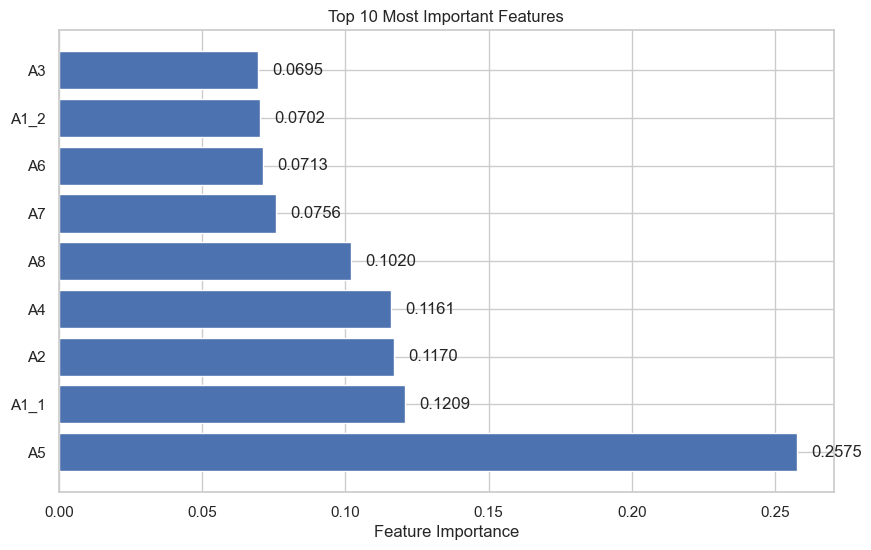

In [171]:
feature_importances = best_param_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
top_n = 8  # Adjust the number of features to display
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Most Important Features')
# Display values at the top of the bars
for bar, value in zip(bars, feature_importance_df['Importance'][:top_n]):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.4f}', va='center')
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score

for target_column in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']:
    target = data[target_column]  
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=43)
    X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)
    
    best_param_clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = best_param_clf.predict(X_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_param_clf, X_train, y_train, cv=5, scoring='accuracy')

    # Display mean and standard deviation of cross-validation scores
    print(f"Cross-Validation Scores for Target Column {target_column}: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")
    
    # Evaluate the model
    accuracy = accuracy_score(y_eval, y_pred)
    conf_matrix = confusion_matrix(y_eval, y_pred)
    classification_rep = classification_report(y_eval, y_pred)

   # Print evaluation metrics with target column name
    print(f'Evaluation for Target Column: {target_column}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('\n' + '-'*40 + '\n')  # Separator for better readability


Cross-Validation Scores for Target Column C1: [0.44444444 0.48314607 0.41573034 0.4494382  0.42696629]
Mean Cross-Validation Score: 0.44394506866416983
Standard Deviation of Cross-Validation Scores: 0.02302820933866433
Evaluation for Target Column: C1
Accuracy: 0.4270833333333333
Confusion Matrix:
[[ 0  0  0  2  0]
 [ 0  0  2  5  0]
 [ 0  0  4 17  0]
 [ 0  0  3 37  0]
 [ 0  0  1 25  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.40      0.19      0.26        21
           4       0.43      0.93      0.59        40
           5       0.00      0.00      0.00        26

    accuracy                           0.43        96
   macro avg       0.17      0.22      0.17        96
weighted avg       0.27      0.43      0.30        96


----------------------------------------

Cross-Validation Scores for Target Column C2: [0.322222

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores for Target Column C7: [0.51111111 0.50561798 0.52808989 0.5505618  0.48314607]
Mean Cross-Validation Score: 0.515705368289638
Standard Deviation of Cross-Validation Scores: 0.02258901378665254
Evaluation for Target Column: C7
Accuracy: 0.4791666666666667
Confusion Matrix:
[[ 0  0  0  0  1]
 [ 0  0  0  0  1]
 [ 0  0  0  2  7]
 [ 0  0  0  7 25]
 [ 0  0  0 14 39]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.30      0.22      0.25        32
           5       0.53      0.74      0.62        53

    accuracy                           0.48        96
   macro avg       0.17      0.19      0.17        96
weighted avg       0.40      0.48      0.43        96


----------------------------------------

Cross-Validation Scores for Target Column C8: [0.3       